<a href="https://colab.research.google.com/github/PavanMutyla/Food_Detection/blob/first_notebook/Food_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
! pip install torchinfo

In [ ]:

import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision import transforms
from torchinfo import summary
import os
import zipfile
import requests
from pathlib import Path
from torch.utils.data import DataLoader

In [ ]:
data = Path("/content/drive/MyDrive/Food_det/data")
img = data/"images"

#img.mkdir(parents=True, exist_ok=True)

In [ ]:
with open(data / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")

        f.write(request.content)

In [ ]:
with zipfile.ZipFile(data/ "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(img)

Unzipping pizza, steak, sushi data...


In [ ]:
train_path = "drive/MyDrive/Food_det/data/images/train"
test_path = "drive/MyDrive/Food_det/data/images/test"

In [ ]:
# transform the data using auto-transform technique
# using a resnet-18 pre-trained model
weights = torchvision.models.ResNet18_Weights.IMAGENET1K_V1

auto_transform = weights.transforms()

In [ ]:
manual_transforms = transforms.Compose([
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])

In [ ]:
weights, auto_transform

(ResNet18_Weights.IMAGENET1K_V1,
 ImageClassification(
     crop_size=[224]
     resize_size=[256]
     mean=[0.485, 0.456, 0.406]
     std=[0.229, 0.224, 0.225]
     interpolation=InterpolationMode.BILINEAR
 ))

In [ ]:
# creating datasets
from torchvision.datasets import ImageFolder

train_data = ImageFolder(root = train_path, transform = auto_transform)

test_data = ImageFolder(root = test_path, transform = auto_transform)

In [ ]:
# creating training and testing dataloaders (batches)
#creating automatic dataloaders
train_batch = DataLoader(dataset=train_data, batch_size=32,shuffle=True)
test_batch = DataLoader(dataset = test_data, batch_size=32, shuffle=False)

In [ ]:
classes = train_data.classes

In [ ]:
classes

['pizza', 'steak', 'sushi']

In [ ]:
# setting up a pre-trained model
model_1 = torchvision.models.resnet18(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 60.6MB/s]


In [ ]:
model_1

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# getting summary of the pre-trained model
pre_summ = summary(model=model_1, input_size = (32,3,224,224),col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])


In [ ]:
pre_summ

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 1000]           --                   True
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   9,408                True
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   128                  True
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 64, 56, 56]     --                   True
│    └─BasicBlock (0)                    [32, 64, 56, 56]     [32, 64, 56, 56]     --                   True
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     36,864               True
│    │    └─BatchN

In [ ]:
for para in model_1.parameters():
    para.requires_grad = False

In [ ]:

for i in model_1.parameters():
    print(i.requires_grad)


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [ ]:
# replacing the classifier layer accordingly and keeping all params same
model_1.fc #-> name of the output/calssifier/linear layer
torch.cuda.manual_seed(42)
model_1.fc = nn.Linear(in_features = 512, out_features = len(classes), bias=True).to(device)

In [ ]:
summary(model=model_1, input_size=(32,3,224,224), col_names=["input_size", "output_size", "num_params", "trainable"],col_width=20,row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 3]              --                   Partial
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   (9,408)              False
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   (128)                False
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 64, 56, 56]     --                   False
│    └─BasicBlock (0)                    [32, 64, 56, 56]     [32, 64, 56, 56]     --                   False
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     (36,864)             False
│    │    

In [ ]:
# setting up train and test loo
def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct/len(y_pred)*100
    return acc

# optimizer initialization
optimizer = torch.optim.Adam(params = model_1.parameters(), lr = 0.01)

# setting up loss function
loss_func = nn.CrossEntropyLoss()

In [ ]:
loss_func

CrossEntropyLoss()

In [ ]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [ ]:
from tqdm.auto import tqdm

In [ ]:
torch.manual_seed(44)
def train_model(model:torch.nn.Module, data:torch.utils.data.DataLoader, loss_func:torch.nn.Module, optimizer:torch.optim.Optimizer, accuracy, device:torch.device = device):
    train_loss, train_acc = 0,0
    n = 2
    for i in tqdm(range(n)):
        model.to(device)
        for batch, (X,y) in enumerate(data):
            X,y = X.to(device), y.to(device)
            train_preds = model(X)

            loss = loss_func(train_preds,y)

            train_loss+=loss

            train_acc+=accuracy(y_true = y,y_pred=train_preds.argmax(dim=1))

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()

        train_loss/=len(data)
        train_acc/=len(data)

        print(f"train_loss:{train_loss:.5f}, train_acc:{train_acc:.5f}")


In [ ]:
train_model(model = model_1, data=train_batch, loss_func = loss_func, optimizer = optimizer, accuracy = accuracy)

  0%|          | 0/4 [00:00<?, ?it/s]

train_loss:1.98115, train_acc:32.42188
train_loss:1.70975, train_acc:66.94336
train_loss:1.87859, train_acc:57.58667
train_loss:0.94224, train_acc:84.93271


In [ ]:
def test(model:torch.nn.Module, data:torch.utils.data.DataLoader, loss_func:torch.nn.Module, accuracy, device:torch.device = device):
    test_loss, test_acc = 0,0
    num = 3
    model.to(device)
    for i in range(num):
        model.eval()
        with torch.inference_mode():
            for X,y in data:
                X,y = X.to(device), y.to(device)

                test_preds = model(X)

                test_loss+=loss_func(test_preds,y)

                test_acc+=accuracy(y,test_preds.argmax(dim=1))

            test_loss/=len(data)
            test_acc/=len(data)

            print(f"test_loss:{test_loss:.5f}, test_acc:{test_acc:.5f}")


In [ ]:
test(model=model_1, data=test_batch, loss_func = loss_func, accuracy = accuracy)

test_loss:0.58181, test_acc:72.34848
test_loss:0.77574, test_acc:96.46465
test_loss:0.84039, test_acc:104.50337


In [ ]:
from typing import List,Tuple
from PIL import Image

In [ ]:
def plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device=device):


    # 2. Open image
    img = Image.open(image_path)

    # 3. Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    ### Predict on image ###

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Plot image with predicted label and probability

    plt.figure(figsize = (10,4))
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);


In [ ]:
test_image_path =  list(Path(test_path).glob("*/*.jpg"))

In [ ]:
import random

In [ ]:
test_image_sample = random.sample(population=test_image_path,
                                       k=4)

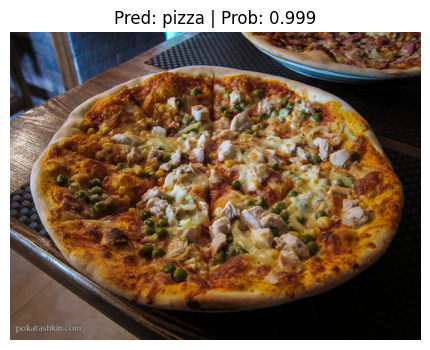

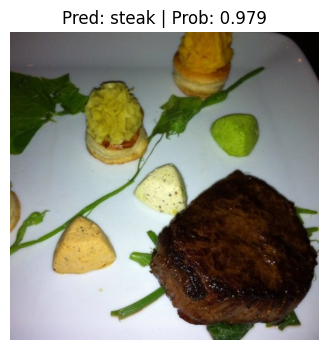

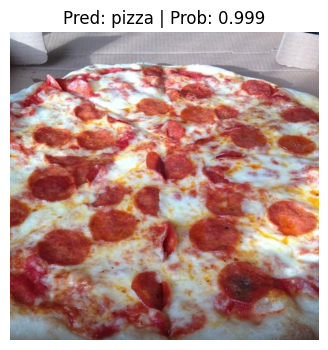

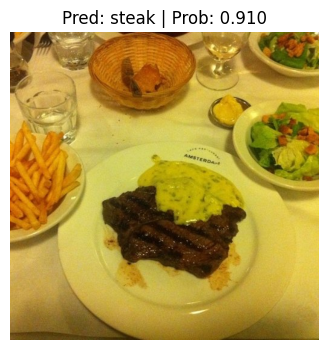

In [ ]:
for img in test_image_sample:
    plot_image(model = model_1, image_path=img, class_names = classes)

In [ ]:
vit_weights = torchvision.models.ViT_B_32_Weights.DEFAULT

In [ ]:
vit_model = torchvision.models.vit_b_32(weights = vit_weights)

Downloading: "https://download.pytorch.org/models/vit_b_32-d86f8d99.pth" to /root/.cache/torch/hub/checkpoints/vit_b_32-d86f8d99.pth
100%|██████████| 337M/337M [00:02<00:00, 172MB/s]


In [ ]:
vit_transform = vit_weights.transforms()

In [ ]:
vit_train = ImageFolder(root = train_path, transform = vit_transform)
vit_test = ImageFolder(root = test_path, transform = vit_transform)

In [ ]:
vit_train_batch = DataLoader(vit_train, batch_size = 32, shuffle = True)
vit_test_batch = DataLoader(vit_test, batch_size = 32, shuffle = False)

In [ ]:
summary(model = vit_model, input_size = (32,3,224,224), col_names=['input_size','output_size', 'num_params', 'trainable'], row_settings=['var_names'])

Layer (type (var_name))                                      Input Shape               Output Shape              Param #                   Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]         [32, 1000]                768                       True
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]         [32, 768, 7, 7]           2,360,064                 True
├─Encoder (encoder)                                          [32, 50, 768]             [32, 50, 768]             38,400                    True
│    └─Dropout (dropout)                                     [32, 50, 768]             [32, 50, 768]             --                        --
│    └─Sequential (layers)                                   [32, 50, 768]             [32, 50, 768]             --                        True
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 50, 768]             [32, 50, 768]             7,087,872           

In [ ]:
for params in vit_model.parameters():
    params.requires_grad = False

In [ ]:
vit_model

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [ ]:
vit_model = vit_model.to(device)

In [ ]:
vit_model.heads = nn.Sequential(nn.Linear(in_features = 768, out_features = len(classes), bias = True))

In [ ]:
summary(model = vit_model, input_size = (32,3,224,224), col_names= ['input_size', 'output_size', 'trainable', 'num_params'], row_settings=['var_names'])

Layer (type (var_name))                                      Input Shape               Output Shape              Trainable                 Param #
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]         [32, 3]                   Partial                   768
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]         [32, 768, 7, 7]           False                     (2,360,064)
├─Encoder (encoder)                                          [32, 50, 768]             [32, 50, 768]             False                     38,400
│    └─Dropout (dropout)                                     [32, 50, 768]             [32, 50, 768]             --                        --
│    └─Sequential (layers)                                   [32, 50, 768]             [32, 50, 768]             False                     --
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 50, 768]             [32, 50, 768]             False           

In [ ]:
vit_optim = torch.optim.Adam(params = vit_model.parameters(), lr=1e-3)

In [ ]:
train_model(model = vit_model, data = vit_train_batch, optimizer =vit_optim, loss_func= loss_func, accuracy = accuracy )

  0%|          | 0/4 [00:00<?, ?it/s]

train_loss:0.73825, train_acc:78.90625
train_loss:0.45815, train_acc:105.17578
train_loss:0.28384, train_acc:108.85010
train_loss:0.20601, train_acc:109.70001


In [ ]:
import shutil


In [ ]:
shutil.rmtree('drive/MyDrive/f 101')

In [ ]:
import torchvision.transforms

In [ ]:
root = 'drive/MyDrive/101'

In [ ]:
data_101 = torchvision.datasets.Food101(root = root, split = "train", download = True, transform = transforms.ToTensor())

100%|██████████| 4996278331/4996278331 [04:09<00:00, 20038672.54it/s]


Extracting drive/MyDrive/101/food-101.tar.gz to drive/MyDrive/101


In [ ]:
import os
import random

In [ ]:
source = '/content/drive/MyDrive/101/food-101/images'

train_dir = '/content/drive/MyDrive/101/food-101/train_101'

test_dir = '/content/drive/MyDrive/101/food-101/test_101'

In [ ]:
train_ratio = 0.8

In [ ]:
class_names = data_101.classes

In [ ]:
len(class_names)

101

In [ ]:
for class_folder in os.listdir(source):
    class_path = os.path.join(source, class_folder)

    # Create class-specific directories in train and test splits
    train_class_dir = os.path.join(train_dir, class_folder)
    test_class_dir = os.path.join(test_dir, class_folder)

    if not os.path.exists(train_class_dir):
        os.makedirs(train_class_dir)

    if not os.path.exists(test_class_dir):
        os.makedirs(test_class_dir)

    # List all image files in the class folder
    image_files = [f for f in os.listdir(class_path) if f.endswith(".jpg")]  # Adjust file extension if needed

    # Calculate the number of images to put in the train split based on the ratio
    num_train = int(len(image_files) * train_ratio)

    # Randomly shuffle the image list
    random.shuffle(image_files)

    # Split the images into train and test sets
    train_images = image_files[:num_train]
    test_images = image_files[num_train:]

    # Copy train images to the train class directory
    for img in train_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(train_class_dir, img)
        shutil.copy(src, dst)

    # Copy test images to the test class directory
    for img in test_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(test_class_dir, img)
        shutil.copy(src, dst)


In [ ]:
vit_weights = torchvision.models.ViT_B_16_Weights.IMAGENET1K_V1.DEFAULT

In [ ]:
vit_transform = vit_weights.transforms()
vit_transform

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
from torchvision.datasets import ImageFolder

In [ ]:
train_101  = ImageFolder(root = train_dir, transform=vit_transform)

In [ ]:
test_101 = ImageFolder(root = test_dir, transform = vit_transform)

In [ ]:
train_101_data = DataLoader(dataset = train_101, batch_size =128, shuffle = True)

In [ ]:
test_101_data = DataLoader(dataset = test_101, batch_size = 128, shuffle = False)

In [ ]:
vit_model = torchvision.models.vit_b_16(weights = vit_weights)

In [ ]:
for para in vit_model.parameters():
    para.requires_grad = False

In [ ]:
summary(model = vit_model, input_size = (32,3,224,224), col_names = ['input_size', 'output_size', 'trainable', 'num_params'], row_settings=['var_names'])

Layer (type (var_name))                                      Input Shape               Output Shape              Trainable                 Param #
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]         [32, 1000]                False                     768
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]         [32, 768, 14, 14]         False                     (590,592)
├─Encoder (encoder)                                          [32, 197, 768]            [32, 197, 768]            False                     151,296
│    └─Dropout (dropout)                                     [32, 197, 768]            [32, 197, 768]            --                        --
│    └─Sequential (layers)                                   [32, 197, 768]            [32, 197, 768]            False                     --
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]            [32, 197, 768]            False            

In [ ]:
vit_model.heads = nn.Sequential(nn.Linear(in_features = 768, out_features = len(class_names)))

In [ ]:
vit_loss  = nn.CrossEntropyLoss()

In [ ]:
vit_optim = torch.optim.Adam(params = vit_model.parameters(), lr=0.001)

In [ ]:
def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct/len(y_pred)*100
    return acc

In [ ]:
train_model(model=vit_model, data=train_101_data, optimizer = vit_optim, loss_func = vit_loss, accuracy = accuracy)

  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
import shutil

In [ ]:
shutil.rmtree('/content/drive/MyDrive/101')